Welcome! This is a tutorial about RASpy (Reaction Activity Scores in Python). 
In this notebook, we will show:
- How to compute a RAS matrix starting from a scRNA-seq dataset and a metabolic model. 
- How to perform RAS cluster analysis
- How to colour a map of a metabolic network with the metabolic differences (up-regulated or down-regulated RAS values) of two groups of cells

## Load the data

Load the metabolic model (SBML format)

In [1]:
from cobra.io import read_sbml_model
model=read_sbml_model('metabolic_models/RECON3_ensg.xml')
model

Name,Recon3D
Memory address,0x022950e2a580
Number of metabolites,5835
Number of reactions,10600
Number of groups,0
Objective expression,1.0*BIOMASS_maintenance - 1.0*BIOMASS_maintenance_reverse_5b3f9
Compartments,"cytosol, lysosome, mitochondria, endoplasmic reticulum, extracellular space, peroxisome/glyoxysome, nucleus, golgi apparatus, inner mitochondrial compartment"


Load the count matrix (h5ad format). Such a dataset are reported as TPM and was downloaded from the  EBI Single Cell Expression Atlas (https://www.ebi.ac.uk/gxa/sc/experiments/E-GEOD-86618/downloads)

In [2]:
import scanpy as sc
adata=sc.read_h5ad("datasets/E-GEOD-86618_tpm")
adata

AnnData object with n_obs × n_vars = 540 × 23909
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Sample Characteristic[cell type]', 'Sample Characteristic Ontology Term[cell type]', 'Sample Characteristic[facs marker]', 'Sample Characteristic Ontology Term[facs marker]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Factor Value[single cell identifier]', 'Factor Value Ontology Term[single cell identifier]', 'Factor Value[disease]', 'Factor Value Ontology Term[disease]'

## Compute RAS values

Inizialize the RAS object

In [3]:
import sys
sys.path.insert(1, 'raspy/')
from ras import RAS_computation as rc
ras_object=rc(adata,model)

Compute the RAS values. As default, the sum and min functions are used for evaluating AND or OR operator. If a gene is
not present in the count matrix, we removed it from the GPR.

In [4]:
import time
t0= time.time()
ras_adata=ras_object.compute()
t1 = time.time()-t0
print("Time elapsed: ", t1) # CPU seconds elapsed 

100%|#########################################################################|


Time elapsed:  67.27844619750977


The results of the RAS computation are saved in a AnnData object (obs x reactions)

In [5]:
ras_adata

AnnData object with n_obs × n_vars = 540 × 5566
    obs: 'countmatrix_Sample Characteristic[organism]', 'countmatrix_Sample Characteristic Ontology Term[organism]', 'countmatrix_Sample Characteristic[individual]', 'countmatrix_Sample Characteristic Ontology Term[individual]', 'countmatrix_Sample Characteristic[organism part]', 'countmatrix_Sample Characteristic Ontology Term[organism part]', 'countmatrix_Sample Characteristic[cell type]', 'countmatrix_Sample Characteristic Ontology Term[cell type]', 'countmatrix_Sample Characteristic[facs marker]', 'countmatrix_Sample Characteristic Ontology Term[facs marker]', 'countmatrix_Sample Characteristic[disease]', 'countmatrix_Sample Characteristic Ontology Term[disease]', 'countmatrix_Factor Value[single cell identifier]', 'countmatrix_Factor Value Ontology Term[single cell identifier]', 'countmatrix_Factor Value[disease]', 'countmatrix_Factor Value Ontology Term[disease]'
    var: 'common_gprs', 'compartments', 'GPR rule'

All the information about Cells from the countmatrix are saved in the RAS matrix starting with "countmatrix_"

In [6]:
ras_adata.obs

,countmatrix_Sample Characteristic[organism],countmatrix_Sample Characteristic Ontology Term[organism],countmatrix_Sample Characteristic[individual],countmatrix_Sample Characteristic Ontology Term[individual],countmatrix_Sample Characteristic[organism part],countmatrix_Sample Characteristic Ontology Term[organism part],countmatrix_Sample Characteristic[cell type],countmatrix_Sample Characteristic Ontology Term[cell type],countmatrix_Sample Characteristic[facs marker],countmatrix_Sample Characteristic Ontology Term[facs marker],countmatrix_Sample Characteristic[disease],countmatrix_Sample Characteristic Ontology Term[disease],countmatrix_Factor Value[single cell identifier],countmatrix_Factor Value Ontology Term[single cell identifier],countmatrix_Factor Value[disease],countmatrix_Factor Value Ontology Term[disease]
SRR4216351,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,CC019,NaN,lung,http://purl.obolibrary.org/obo/UBERON_0002048,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,"7AAD-, CD45-, CD31-, CD326+, HTII-280+",NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,01-H12.CC019,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461
SRR4216352,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,CC002,NaN,lung,http://purl.obolibrary.org/obo/UBERON_0002048,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,"7AAD-, CD45-, CD31-, CD326+, HTII-280+",NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,01-N701-S517-A1.CC002,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461
SRR4216353,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,IPF009,NaN,lung,http://purl.obolibrary.org/obo/UBERON_0002048,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,"7AAD-, CD45-, CD31-, CD326+, HTII-280+",NaN,idiopathic pulmonary fibrosis,http://www.ebi.ac.uk/efo/EFO_0000768,01-N701-S517-B5.IPF009,NaN,idiopathic pulmonary fibrosis,http://www.ebi.ac.uk/efo/EFO_0000768
SRR4216354,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,IPF010,NaN,lung,http://purl.obolibrary.org/obo/UBERON_0002048,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,"7AAD-, CD45-, CD31-, CD326+, HTII-280+",NaN,idiopathic pulmonary fibrosis,http://www.ebi.ac.uk/efo/EFO_0000768,01-N701-S517-H1.IPF010,NaN,idiopathic pulmonary fibrosis,http://www.ebi.ac.uk/efo/EFO_0000768
SRR4216355,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,CC019,NaN,lung,http://purl.obolibrary.org/obo/UBERON_0002048,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,"7AAD-, CD45-, CD31-, CD326+, HTII-280+",NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,02-B3.CC019,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR4216886,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,CC006,NaN,lung,http://purl.obolibrary.org/obo/UBERON_0002048,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,"7AAD-, CD45-, CD31-, CD326+, HTII-280+",NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461,H9-1-C48_S10.CC006,NaN,normal,http://purl.obolibrary.org/obo/PATO_0000461
SRR4216887,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,IL006,NaN,lung,http://purl.obolibrary.org/obo/UBERON_0002048,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,"7AAD-, CD45-, CD31-, CD326+, HTII-280+",NaN,idiopathic pulmonary fibrosis,http://www.ebi.ac.uk/efo/EFO_0000768,H9-1-C48_S35.IL006,NaN,idiopathic pulmonary fibrosis,http://www.ebi.ac.uk/efo/EFO_0000768
SRR4216888,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,IPF012,NaN,lung,http://purl.obolibrary.org/obo/UBERON_0002048,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,"7AAD-, CD45-, CD31-, CD326+, HTII-280+",NaN,idiopathic pulmonary fibrosis,http://www.ebi.ac.uk/efo/EFO_0000768,H9-1-C48_S40.IPF012,NaN,idiopathic pulmonary fibrosis,http://www.ebi.ac.uk/efo/EFO_0000768
SRR4216889,Homo sapiens,http://purl.obolibrary.org/obo/NCBITaxon_9606,IPF002,NaN,lung,http://purl.oboli

For all the reactios, we report the associated GPR rule and the reactions having the same GPR

In [7]:
ras_adata.var

,common_gprs,compartments,GPR rule
REACTIONS,,,
ATPS4mi,ATPS4mi,"m,i",( ( ENSG00000099624 and ENSG00000152234 and EN...
ATPasel_1,ATPasel_1,"c,l",( ( ENSG00000105929 and ENSG00000117410 and EN...
CYOOm2i,CYOOm2i,"m,i",( ENSG00000010256 and ENSG00000173660 and ENSG...
CYOR_u10mi,CYOR_u10mi,"m,i",( ENSG00000010256 and ENSG00000173660 and ENSG...
NDPK10n,"NDPK10n,NDPK1n,NDPK2n,NDPK3n,NDPK4n,NDPK5n,NDP...",n,( ENSG00000011052 and ENSG00000239672 ) or ( E...
...,...,...,...
SR5ARr,SR5ARr,r,ENSG00000277893 or ENSG00000145545
BILDGLCURte,BILDGLCURte,"c,e",ENSG00000278183 or ENSG00000023839 or ENSG0000...
SPHS1Pt2e,SPHS1Pt2e,"c,e",ENSG00000278183 or ENSG00000165029


Set the .raw attribute of the AnnData object for later use (see Section Colour Map) 

In [8]:
ras_adata.raw=ras_adata
ras_adata

AnnData object with n_obs × n_vars = 540 × 5566
    obs: 'countmatrix_Sample Characteristic[organism]', 'countmatrix_Sample Characteristic Ontology Term[organism]', 'countmatrix_Sample Characteristic[individual]', 'countmatrix_Sample Characteristic Ontology Term[individual]', 'countmatrix_Sample Characteristic[organism part]', 'countmatrix_Sample Characteristic Ontology Term[organism part]', 'countmatrix_Sample Characteristic[cell type]', 'countmatrix_Sample Characteristic Ontology Term[cell type]', 'countmatrix_Sample Characteristic[facs marker]', 'countmatrix_Sample Characteristic Ontology Term[facs marker]', 'countmatrix_Sample Characteristic[disease]', 'countmatrix_Sample Characteristic Ontology Term[disease]', 'countmatrix_Factor Value[single cell identifier]', 'countmatrix_Factor Value Ontology Term[single cell identifier]', 'countmatrix_Factor Value[disease]', 'countmatrix_Factor Value Ontology Term[disease]'
    var: 'common_gprs', 'compartments', 'GPR rule'

## Pre-processing of the RAS matrix

Drop duplicates reaction (for example, the reaction having the same GPR)

In [9]:
reactions=list(ras_adata.to_df().T.drop_duplicates().index)
ras_adata=ras_adata[:,reactions]
ras_adata

View of AnnData object with n_obs × n_vars = 540 × 1324
    obs: 'countmatrix_Sample Characteristic[organism]', 'countmatrix_Sample Characteristic Ontology Term[organism]', 'countmatrix_Sample Characteristic[individual]', 'countmatrix_Sample Characteristic Ontology Term[individual]', 'countmatrix_Sample Characteristic[organism part]', 'countmatrix_Sample Characteristic Ontology Term[organism part]', 'countmatrix_Sample Characteristic[cell type]', 'countmatrix_Sample Characteristic Ontology Term[cell type]', 'countmatrix_Sample Characteristic[facs marker]', 'countmatrix_Sample Characteristic Ontology Term[facs marker]', 'countmatrix_Sample Characteristic[disease]', 'countmatrix_Sample Characteristic Ontology Term[disease]', 'countmatrix_Factor Value[single cell identifier]', 'countmatrix_Factor Value Ontology Term[single cell identifier]', 'countmatrix_Factor Value[disease]', 'countmatrix_Factor Value Ontology Term[disease]'
    var: 'common_gprs', 'compartments', 'GPR rule'

Total-count normalization

In [10]:
sc.pp.normalize_total(ras_adata, target_sum=1e4)

C:\Users\bruno\anaconda3\envs\progettoRas\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


Logarithmize the data

In [11]:
sc.pp.log1p(ras_adata)

Scale each reaction score to unit variance. Clip values exceeding standard deviation 10.

In [12]:
sc.pp.scale(ras_adata, max_value=10)

## Principal component analysis

Reduce the dimensionality of the data by running principal component analysis (PCA)

In [13]:
sc.tl.pca(ras_adata, svd_solver='arpack')

Make a scatter plot in the PCA coordinates, showing some differences

... storing 'compartments' as categorical


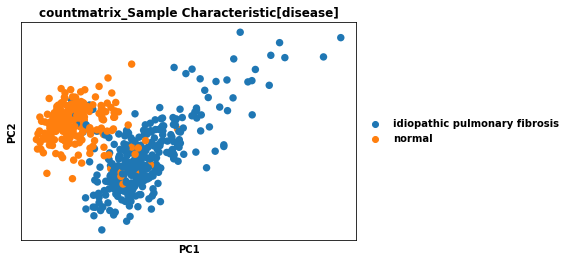

In [14]:
from matplotlib.colors import ListedColormap
sc.pl.pca(ras_adata, color=['countmatrix_Sample Characteristic[disease]'])

Let us inspect the contribution of single PCs to the total variance in the data. 

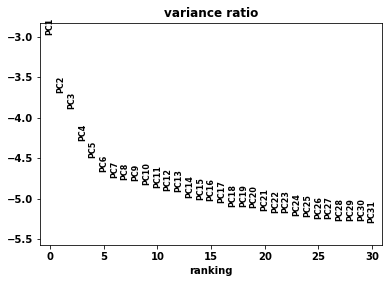

In [15]:
sc.pl.pca_variance_ratio(ras_adata, log=True)

## Compute the clustering (default cluster parameters)

Let us compute the neighborhood graph of cells using the PCA representation of the data matrix. 

In [16]:
sc.pp.neighbors(ras_adata)

Cluster the cells using the Leiden algorithm

In [17]:
sc.tl.leiden(ras_adata)

Embed the graph in two dimensions using UMAP

In [18]:
sc.tl.umap(ras_adata)

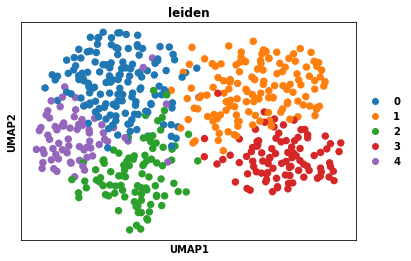

In [19]:
sc.pl.umap(ras_adata, color=['leiden'])

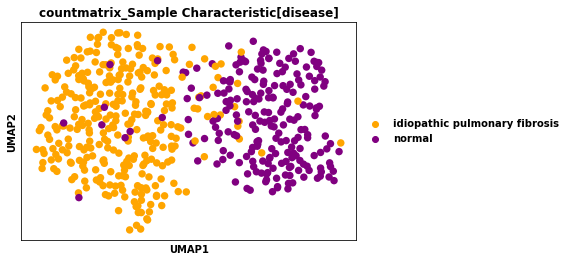

In [20]:
sc.pl.umap(ras_adata, color=['countmatrix_Sample Characteristic[disease]'],
                     palette={"normal":"purple","idiopathic pulmonary fibrosis":"orange"})

## Find best clustering

Now, we select the hyper-parameters of cluster analysis using a grid search method and maximizing the Silhoutte index

In [21]:
from utils import find_bh

In [22]:
n_pcs=[5,10,15,20]
n_neighbors=[5,10,15,20]
resolutions=[0.25,0.5,0.75,1,1.25,1.5]

In [23]:
df=find_bh(ras_adata,resolutions=resolutions,
    n_pcs=n_pcs,
    n_neighbors=n_neighbors)
df

,res,pcs_values,neigh_values,num_cluster,cluster_values_sil
0,0.25,5,5,4,0.176928
1,0.50,5,5,8,0.166627
2,0.75,5,5,11,0.110481
3,1.00,5,5,15,0.108720
4,1.25,5,5,17,0.104735
...,...,...,...,...,...
91,0.50,20,20,2,0.140879
92,0.75,20,20,4,0.123713
93,1.00,20,20,5,0.061805
94,1.25,20,20,7,0.050216


In [24]:
obj_fun="cluster_values_sil"
index=df[obj_fun].argmax()
res,n_pc,n_neighbor=df.iloc[index][["res","pcs_values","neigh_values"]].values

df[obj_fun].max()

0.2980479896068573

Which are the best found hyper-parameters?

In [25]:
res,n_pc,n_neighbor

(0.25, 5.0, 10.0)

In [26]:
sc.pp.neighbors(ras_adata, n_neighbors=int(n_neighbor), n_pcs=int(n_pc))
sc.tl.leiden(ras_adata,resolution=res)
sc.tl.umap(ras_adata)

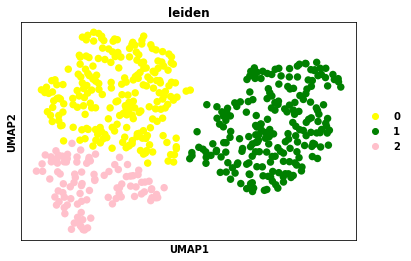

In [27]:
sc.pl.umap(ras_adata, color=['leiden'],
                    palette={"0":"yellow","1":"green","2":"pink"})

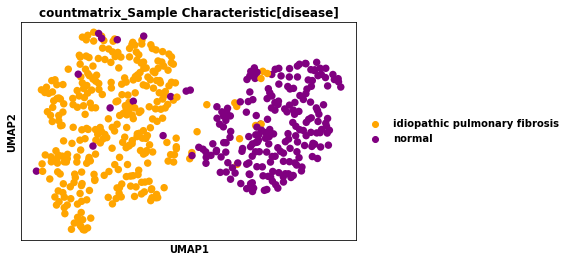

In [28]:
sc.pl.umap(ras_adata, color=['countmatrix_Sample Characteristic[disease]'],
                     palette={"normal":"purple","idiopathic pulmonary fibrosis":"orange"})

## Finding marker reactions and color the MAP

We estabilished that two groups of cells (normal vs IPF) are well separated. Now, we want to find the highly differential reactions in each groups and colour the metabolic differences on a map.

Reload RAS matrix without reaction count scaling

In [29]:
ras_adata2=ras_adata.raw.to_adata()

Total-count normalization

In [30]:
sc.pp.normalize_total(ras_adata2, target_sum=1e4)

Logarithmize the data

In [31]:
sc.pp.log1p(ras_adata2)

Compare the RAS of the two groups "normal" vs "IPF"

In [32]:
name_feature='countmatrix_Sample Characteristic[disease]'

Let us compute a ranking for the highly differential RAS in each dataset.

In [33]:
from ras import computeRAS_diff
import numpy as np
df_comparison=computeRAS_diff(ras_adata2,name_feature)
df_comparison

C:\Users\bruno\AppData\Roaming\Python\Python38\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,idiopathic pulmonary fibrosis vs normal
REACTIONS,
ATPS4mi,0.000000
ATPasel_1,0.000000
CYOOm2i,0.000000
CYOR_u10mi,0.000000
NDPK10n,0.000000
...,...
SR5ARr,0.823154
BILDGLCURte,1.584963
SPHS1Pt2e,-0.626502


Suppose now that you have a map (in svg format) of the metabolic network (or a part of it).  You can plot the metabolic difference of these two groups and save in a new map

In [34]:
mapNetwork="metabolic_maps/Glycolisis_TCA_PPP.svg"    #name of the SVF file (Escher format) of the metabolic map

In [35]:
mapNetwork2="metabolic_maps/Glycolisis_TCA_PPP_colured.svg" #name of output SVG file with coloured map

In [36]:
from ras import RAS_map
import numpy as np
mappa=RAS_map()
image=mappa.colorMap(mapNetwork,
                     mapNetwork2,
                     df_comparison,
                     colors=["blue","red"],         #the first color is for down-regulated reactio,the second for up-regulated
                     nosignificant_color="grey",    #color of reaction whose differences results not significant
                     width_image=1800               #dimension of the SVG image
                    )

In [37]:
image